c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


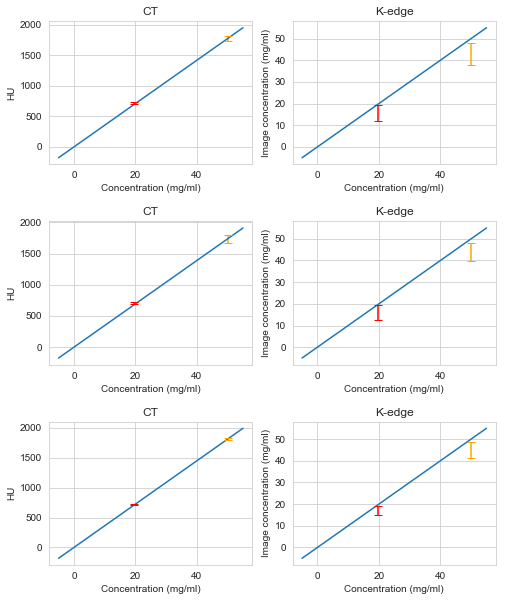

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-31_CT_AuNPs_2'
folder1 = 'phantom_scan_1'  # 5 nm
folder2 = 'phantom_scan_2'  # 50 nm
folder3 = 'phantom_scan_3'

masks_name = 'contrast_masks_Au_control.npy'

fig, ax = plt.subplots(3, 2, figsize=(8, 10))
sns.set_style('whitegrid')
xpts = np.linspace(-5, 55, 300)

for i, folder in enumerate([folder1, folder2, folder3]):

    ct = np.load(os.path.join(directory, folder, 'Norm CT', 'CT_norm.npy'))[2]
    k = np.load(os.path.join(directory, folder, 'Norm CT', 'K-edge_Au.npy'))

    mask = np.load(os.path.join(directory, folder, masks_name))

    mean_50 = np.zeros((2, 5))
    mean_19 = np.zeros((2, 5))

    for idx, val in enumerate([8, 9, 10, 11, 12]):

        if val == 10:
            mean_50[0, idx] = np.nan
            mean_19[0, idx] = np.nan

            mean_50[1, idx] = np.nanmean(mask[0, idx-1] * k[val])
            mean_19[1, idx] = np.nanmean(mask[1, idx-1] * k[val])

        elif val == 8 or val == 11 or val == 13:
            mean_50[1, idx] = np.nan
            mean_19[1, idx] = np.nan

            mean_50[0, idx] = np.nanmean(mask[0, idx] * ct[val])
            mean_19[0, idx] = np.nanmean(mask[1, idx] * ct[val])

        else:
            mean_50[0, idx] = np.nanmean(mask[0, idx]*ct[val])
            mean_50[1, idx] = np.nanmean(mask[0, idx] * k[val])

            mean_19[0, idx] = np.nanmean(mask[1, idx] * ct[val])
            mean_19[1, idx] = np.nanmean(mask[1, idx] * k[val])

    std_50 = np.nanstd(mean_50, axis=1)
    mean_50 = np.nanmean(mean_50, axis=1)

    std_19 = np.nanstd(mean_19, axis=1)
    mean_19 = np.nanmean(mean_19, axis=1)



    ax[i, 0].plot(xpts, mean_50[0]/50*xpts, color='C0')
    ax[i, 0].errorbar(19.67, mean_19[0], yerr=std_19[0], fmt='none', capsize=4, color='red')
    ax[i, 0].errorbar(50, mean_50[0], yerr=std_50[0], fmt='none', capsize=4, color='orange')
    ax[i, 0].set_title('CT')
    ax[i, 0].set_ylabel('HU')
    ax[i, 0].set_xlabel('Concentration (mg/ml)')

    ax[i, 1].plot(xpts, xpts, color='C0')
    ax[i, 1].errorbar(19.67, mean_19[1], yerr=std_19[1], fmt='none', capsize=4, color='red')
    ax[i, 1].errorbar(50, mean_50[1], yerr=std_50[1], fmt='none', capsize=4, color='orange')
    ax[i, 1].set_title('K-edge')
    ax[i, 1].set_ylabel('Image concentration (mg/ml)')
    ax[i, 1].set_xlabel('Concentration (mg/ml)')

fig.subplots_adjust(hspace=0.4)
fig.show()
